<a href="https://colab.research.google.com/github/shivali917/LungCancerIdentification/blob/main/LungCancerAnalysis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
# Data 
data.shape

(309, 16)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


AGE - The dataset is mostly of elderly people with mean and median both around 62 years. Although low age groups are also present. Minimum being - 21 years.

SMOKING - The dataset is mostly composed of people who smokes. Inferred from mean. As values are either 1 or 2 mean should be 1.5 if perfectly balanced.

YELLOW_FINGERS - The dataset is mostly composed of people with yellow fingers. Inferred from mean.

ANXIETY - The dataset is balanced in this regard.

PEER_PRESSURE - The dataset is balanced in this regard.

CHRONIC_DISEASE - The dataset is balanced in this regard.

FATIGUE - The dataset mostly composes of people with signs of fatigueness.

ALLERGY - The dataset mostly composes of people with allergy.

WHEEZING - The dataset mostly composes of people with wheezing symptom.

ALCOHOL CONSUMING - The dataset mostly composes of people who consumes alcohol.

COUGHING - The dataset mostly composes of people with coughing symptom.

SHORTNESS OF BREATH - The dataset mostly composes of people with shortness of breath.

SWALLOWING DIFFICULTY - The dataset mostly composes of people with not having difficulty with swallowing.

CHEST PAIN - The dataset mostly composes of people with chest pain.

The dataset looks like it is skewed in certain directions so I will check the datast to make sure the data is evenly distributed. 

In [ ]:
#check for null values 
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

No null values!

In [ ]:
data.duplicated().sum()

33

We have 33 duplicated rows so lets drop them

In [ ]:
data.drop_duplicates(inplace = True)
data.shape

(276, 16)

Notice that the gender and lung cancer columns are filled with text so we should label encode those to certain values

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['LUNG_CANCER']=encoder.fit_transform(data['LUNG_CANCER'])
data['GENDER']=encoder.fit_transform(data['GENDER'])
data.head()

# Gender = 1 is male and 0 is female
# Lung_Cancer = 1 is lung cancer and 0 is no lung cancer

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


Exploratory data analysis (EDA)

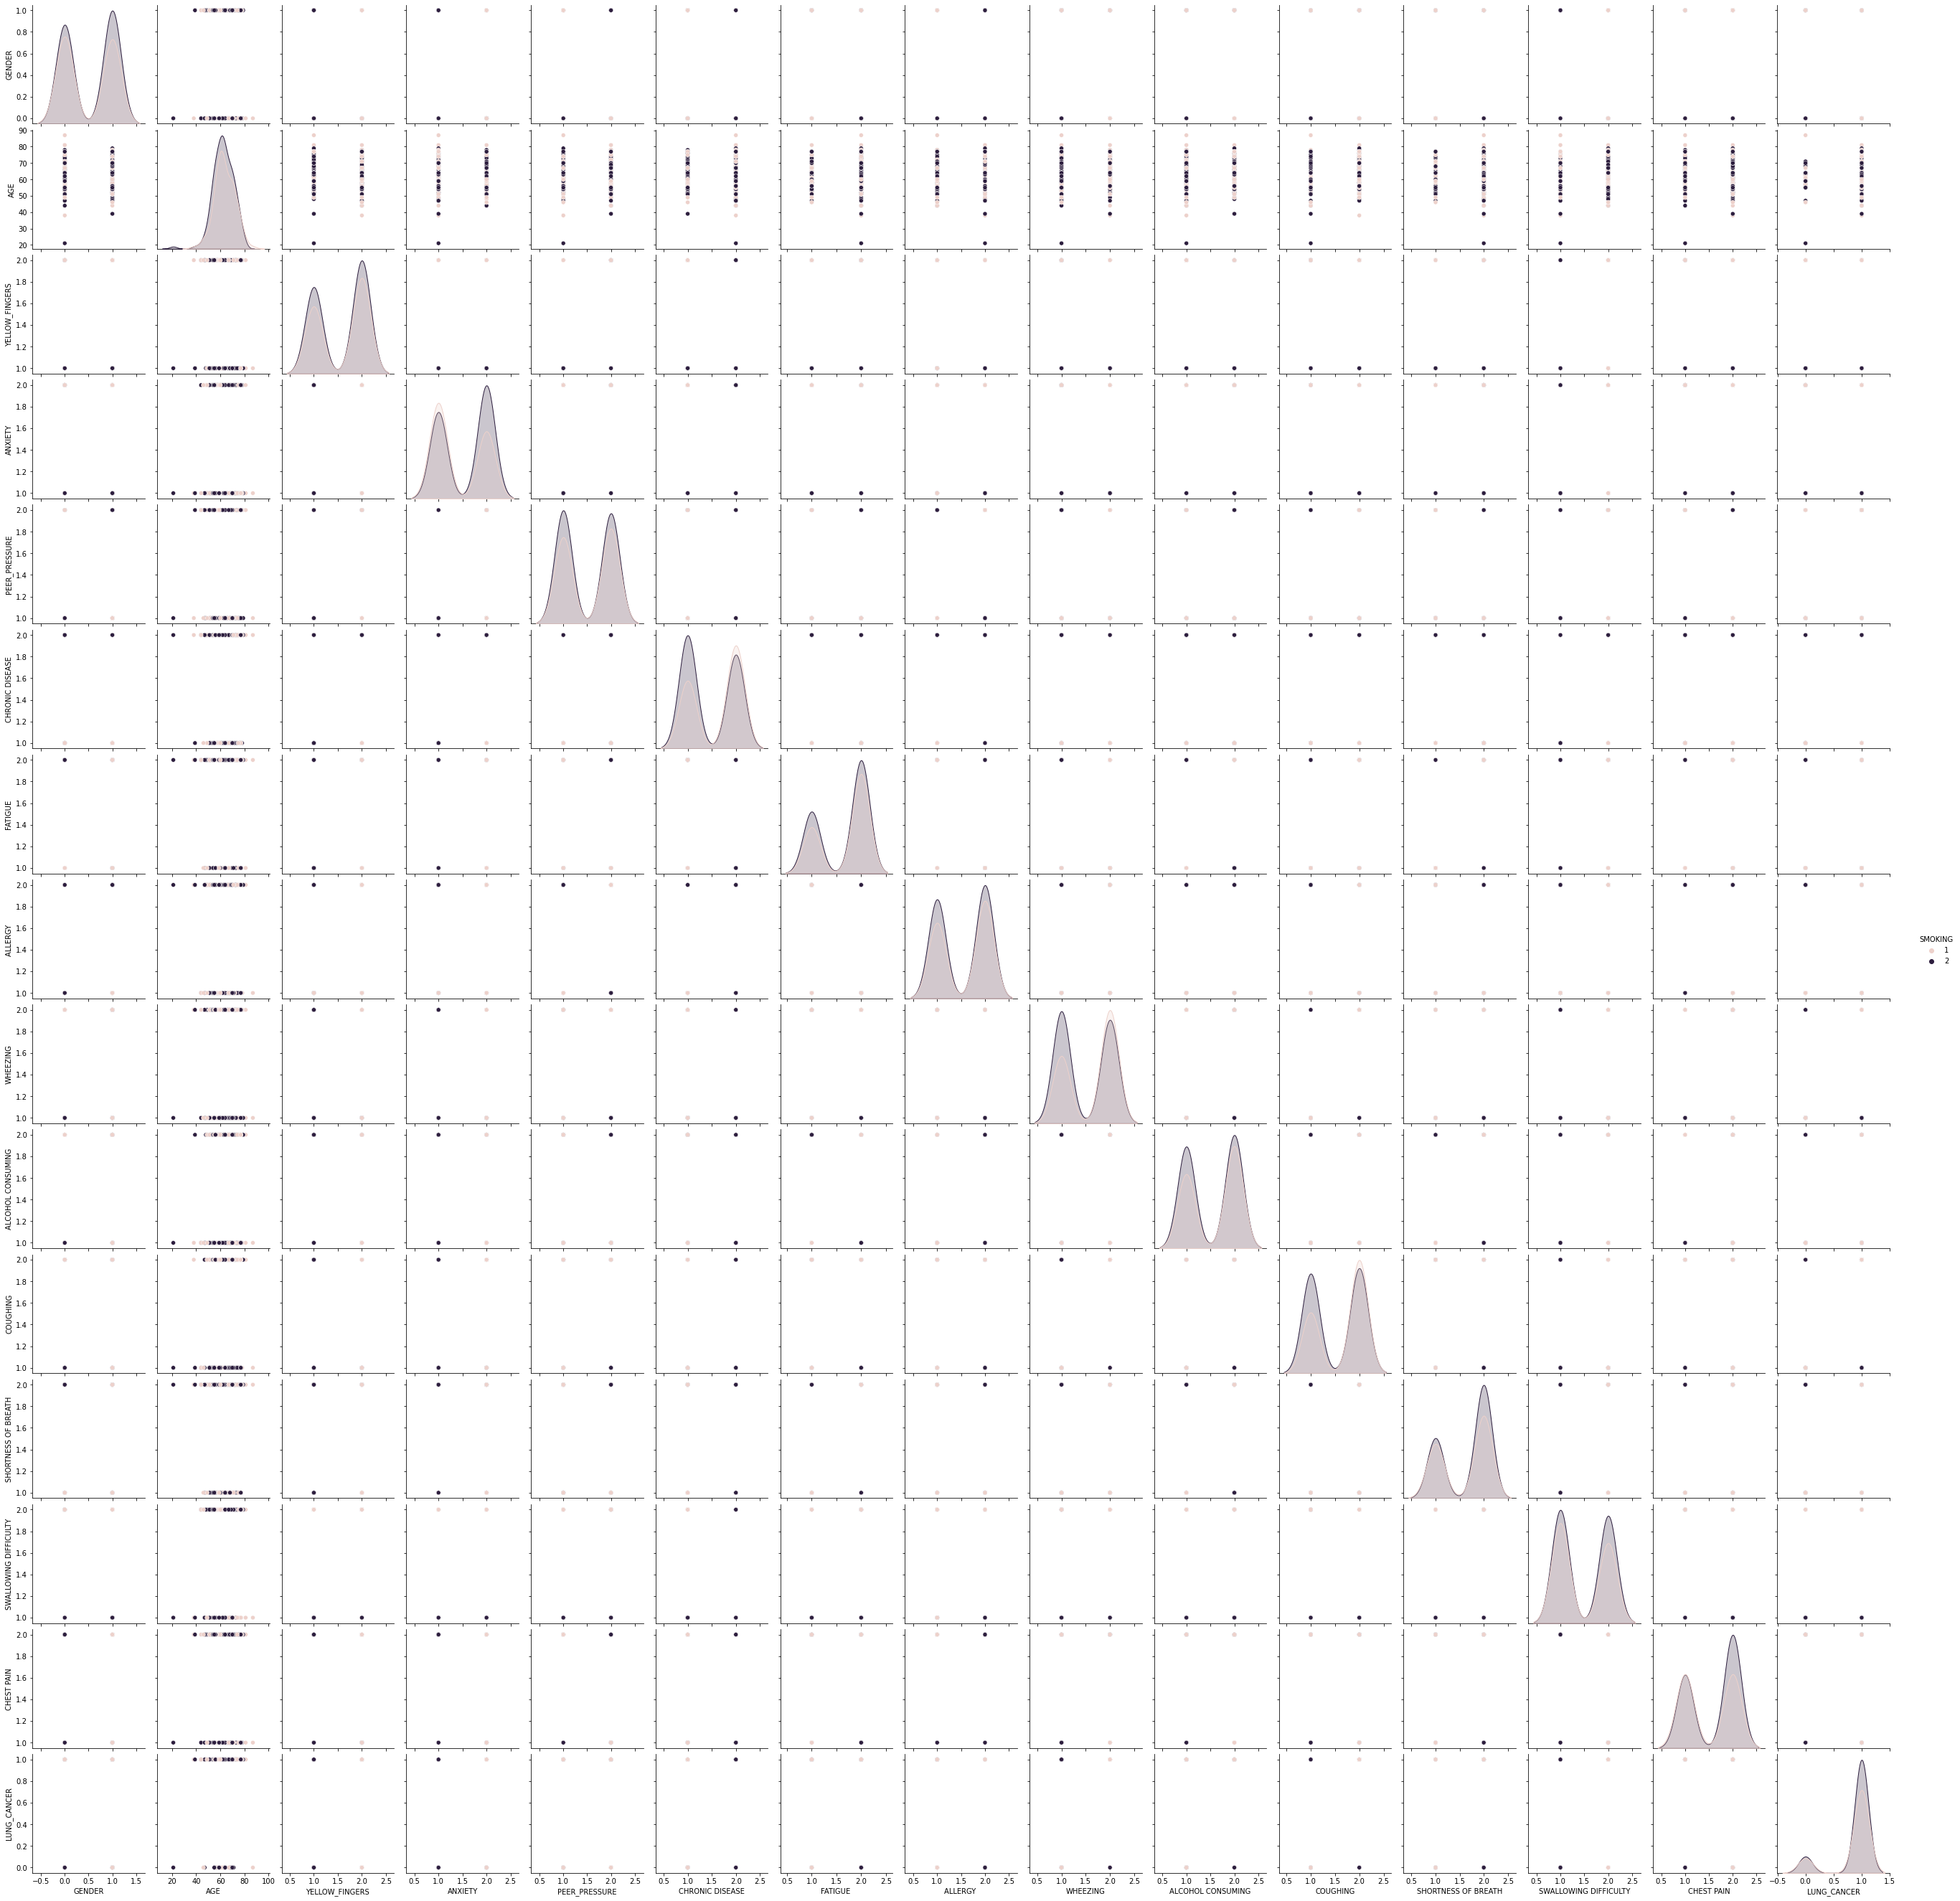

In [ ]:
import seaborn
import matplotlib.pyplot as plt

# pairplot with hue sex
seaborn.pairplot(data, hue ='SMOKING')
# to show
plt.show()

                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.013120  0.041131       -0.202506 -0.152032   
AGE                   -0.013120  1.000000 -0.073410        0.025773  0.050605   
SMOKING                0.041131 -0.073410  1.000000       -0.020799  0.153389   
YELLOW_FINGERS        -0.202506  0.025773 -0.020799        1.000000  0.558344   
ANXIETY               -0.152032  0.050605  0.153389        0.558344  1.000000   
PEER_PRESSURE         -0.261427  0.037848 -0.030364        0.313067  0.210278   
CHRONIC DISEASE       -0.189925 -0.003431 -0.149415        0.015316 -0.006938   
FATIGUE               -0.079020  0.021606 -0.037803       -0.099644 -0.181474   
ALLERGY                0.150174  0.037139 -0.030179       -0.147130 -0.159451   
WHEEZING               0.121047  0.052803 -0.147081       -0.058756 -0.174009   
ALCOHOL CONSUMING      0.434264  0.052049 -0.052771       -0.273643 -0.152228   
COUGHING               0.120

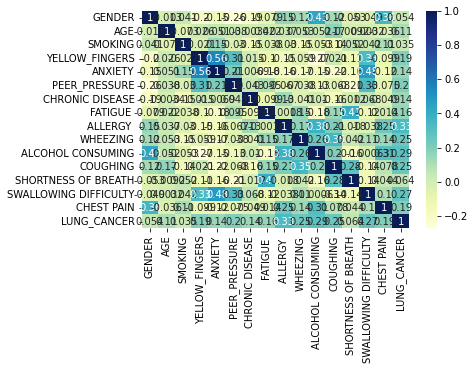

In [ ]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb


# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()


In [ ]:
con_col = ['AGE']
cat_col=[]
for i in data.columns:
    if i!='AGE':
        cat_col.append(i)

Text(0.5, 0.98, 'Visualizing Categorical Columns')

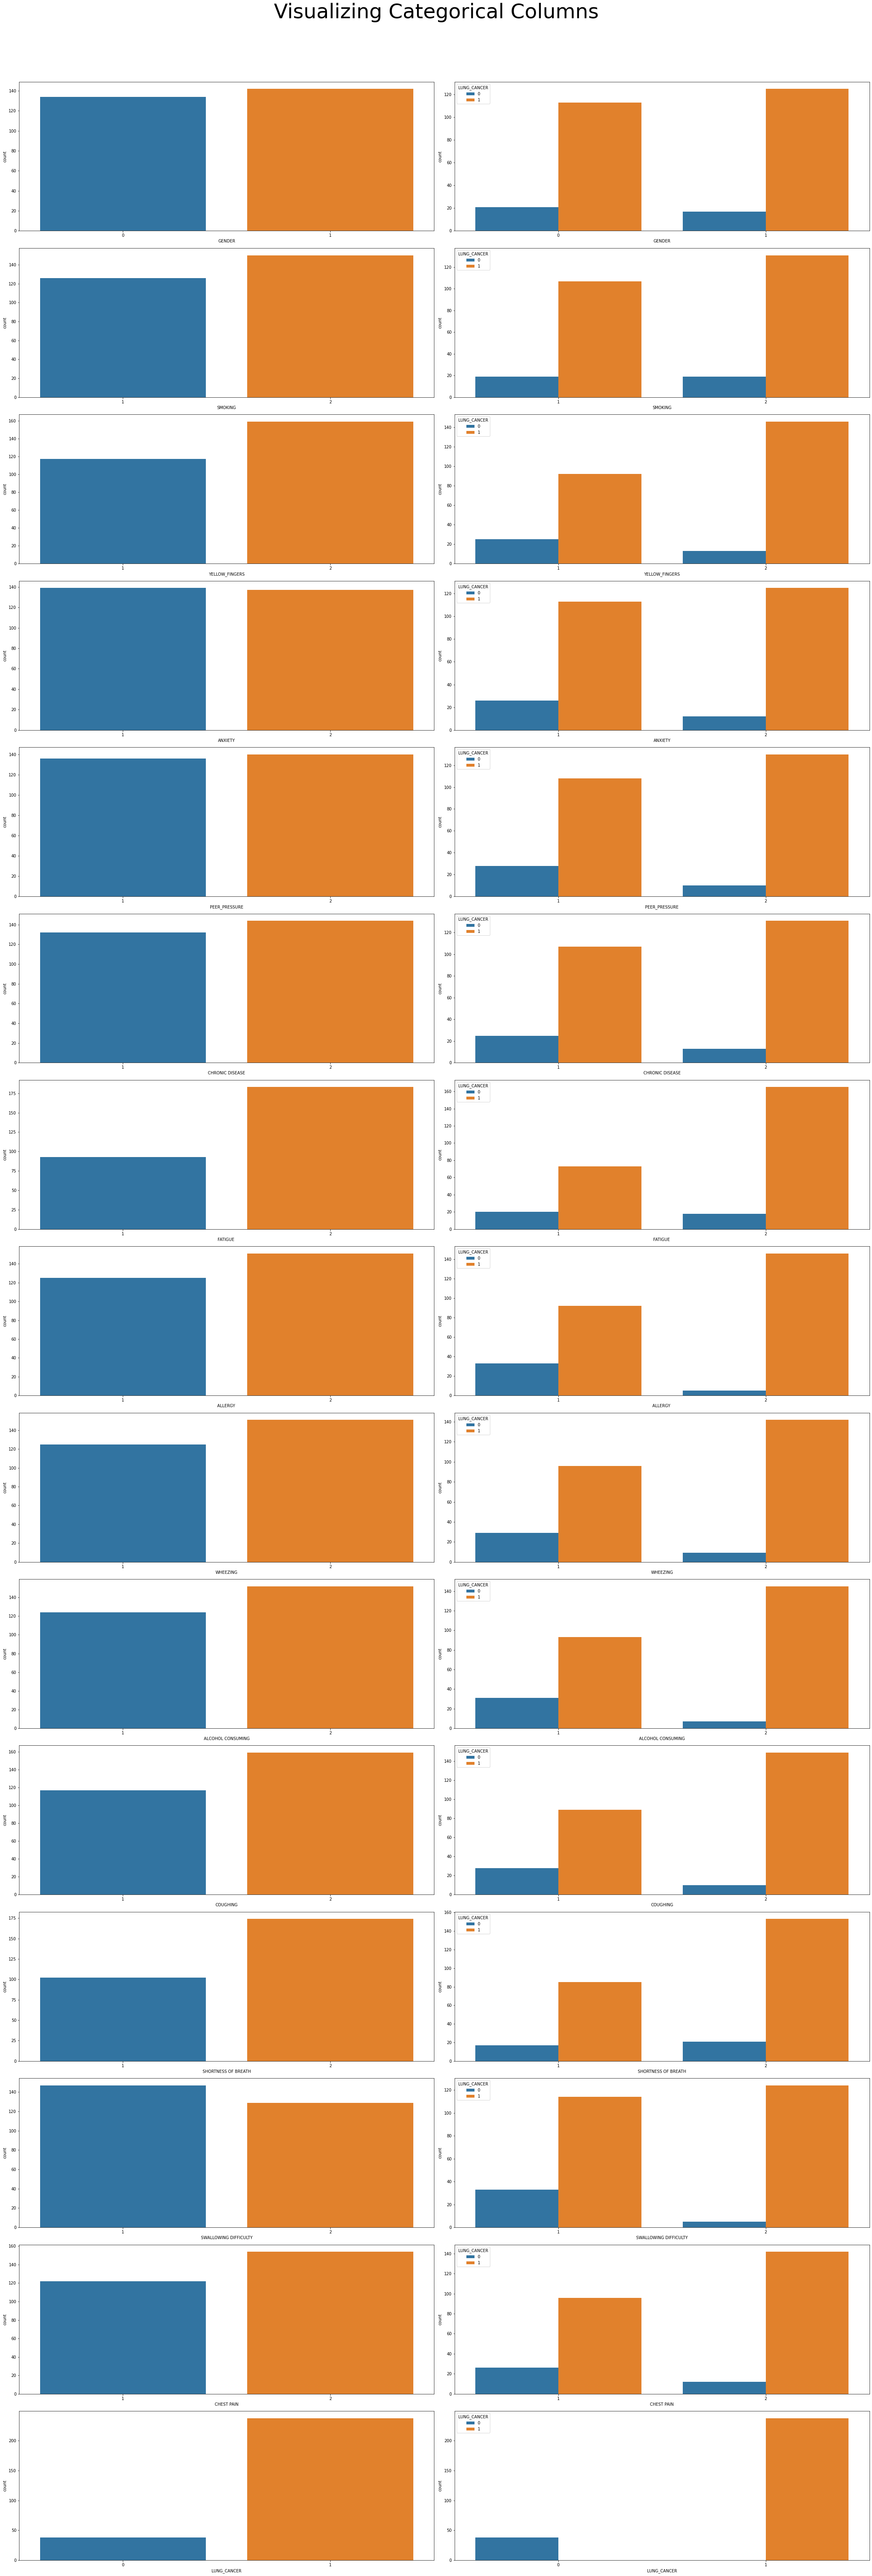

In [ ]:
fig,ax = plt.subplots(15,2,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.countplot(data=data,x=i,ax=ax[index,0])
    sns.countplot(data=data,x=i,ax=ax[index,1],hue='LUNG_CANCER')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Categorical Columns",fontsize=50)

Text(0.5, 0.98, 'Visualizing AGE vs Categorical Columns')

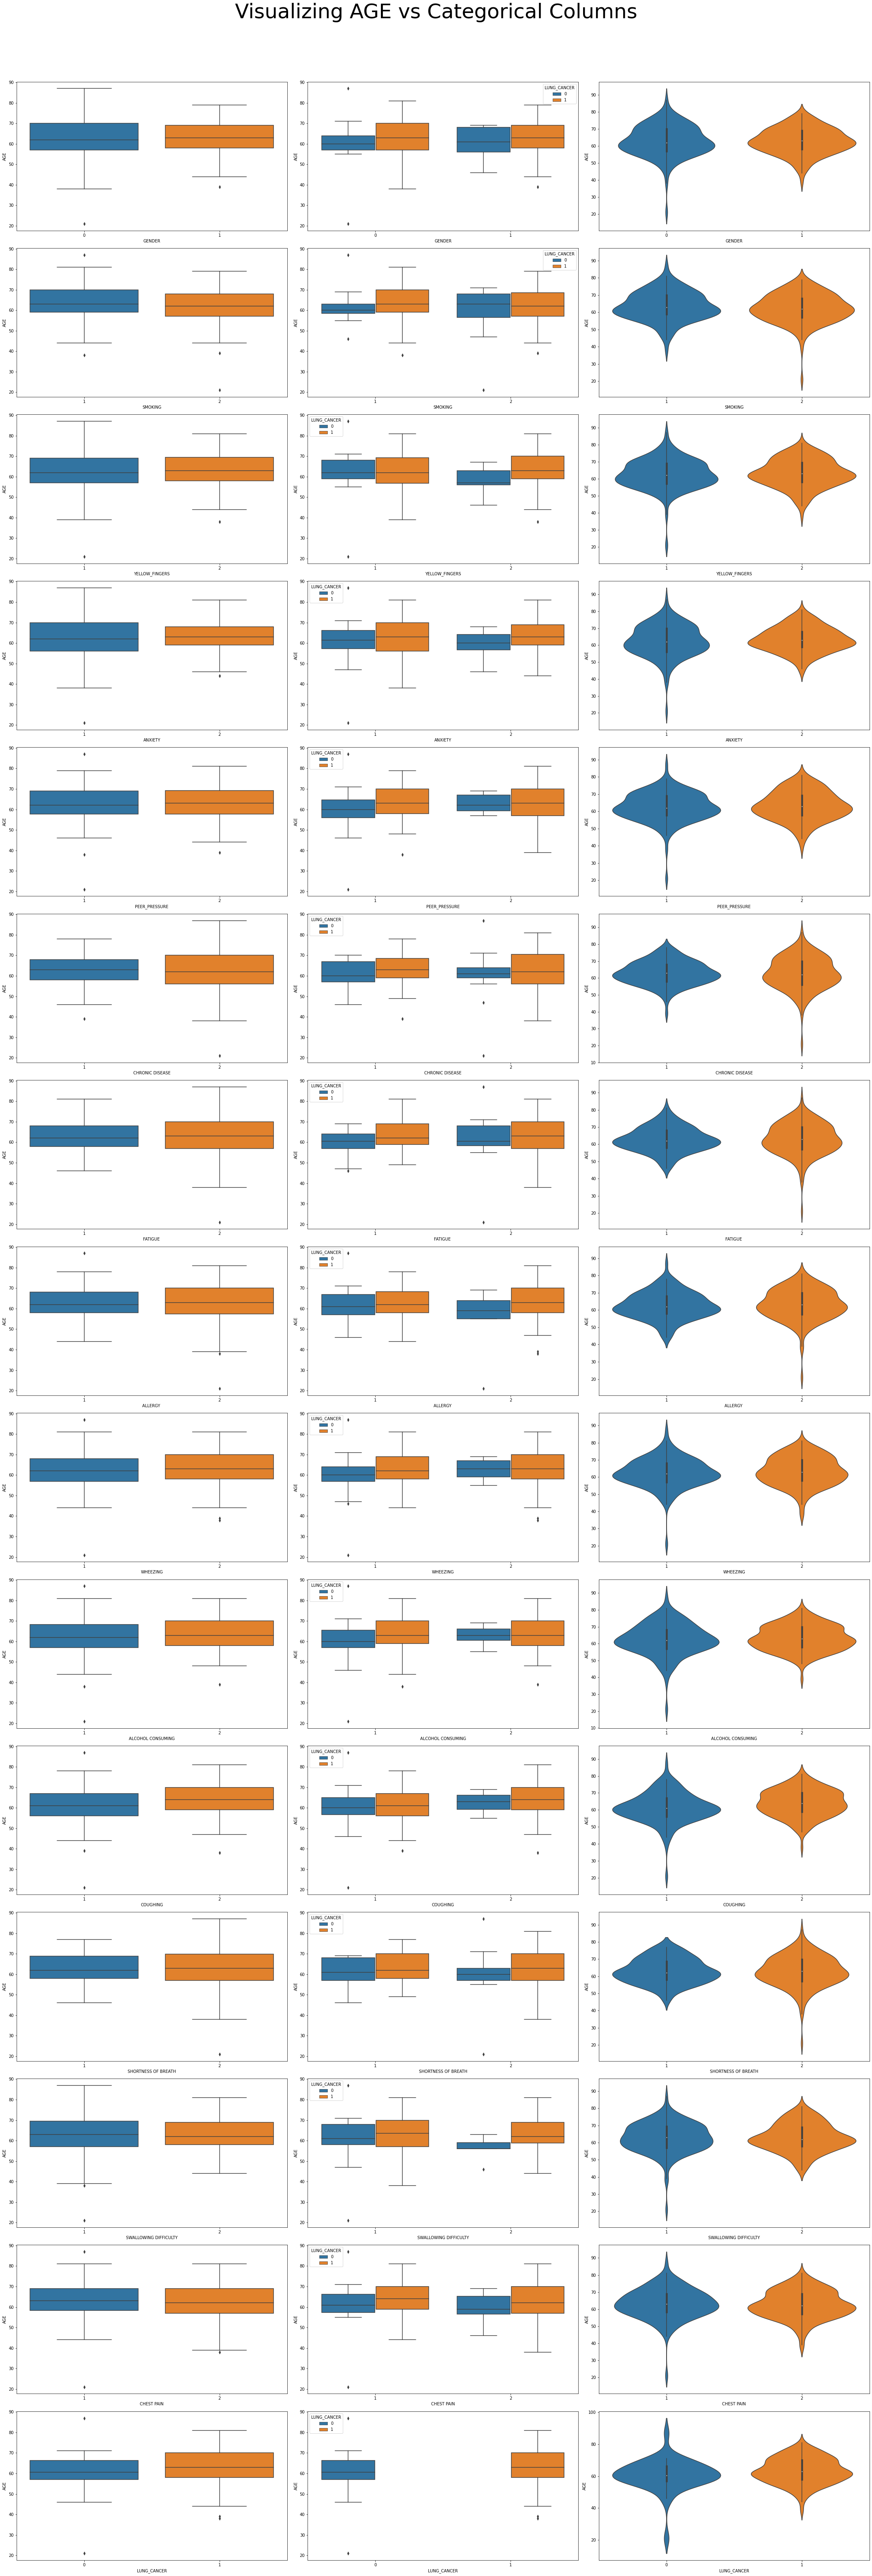

In [ ]:
fig,ax = plt.subplots(15,3,figsize=(30,90))
for index,i in enumerate(cat_col):
    sns.boxplot(x=data[i],y=data['AGE'],ax=ax[index,0])
    sns.boxplot(x=data[i],y=data['AGE'],ax=ax[index,1],hue=data['LUNG_CANCER'])
    sns.violinplot(x=data[i],y=data['AGE'],ax=ax[index,2])
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing AGE vs Categorical Columns",fontsize=50)

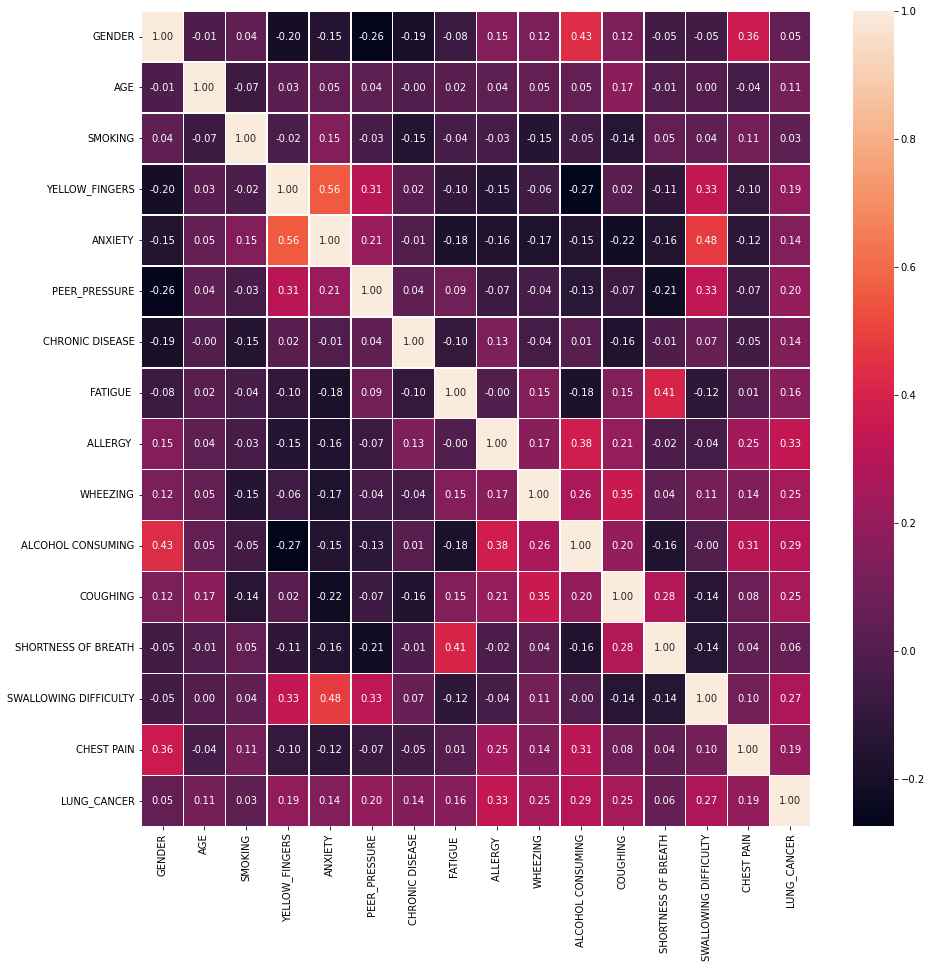

In [ ]:
#correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt='0.2f')

In [ ]:
# seperating dataframe into X and y datasets
X = data.drop(['LUNG_CANCER'], axis = 1)
y = data['LUNG_CANCER']
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,1,2,2,2,1,1,2,2,1,2,1,2,1
280,0,59,2,1,1,1,2,2,2,1,1,1,2,1,1
281,1,55,2,1,1,1,1,2,2,1,1,1,2,1,2
282,1,46,1,2,2,1,1,1,1,1,1,1,1,2,2


In [ ]:
#change values from 2, 1 to 1, 0
for i in X.columns[2:]:
    temp=[]
    for j in X[i]:
        temp.append(j-1)
    X[i]=temp
X.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0


In [ ]:
# oversampling 
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)
#https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/ 
# More reading above

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape : (357, 15)
Test shape: (119, 15)


In [ ]:
# scaling the age column 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['AGE']=scaler.fit_transform(X_train[['AGE']])
X_test['AGE']=scaler.transform(X_test[['AGE']])
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
321,1,0.163715,1,0,0,1,0,0,0,0,0,1,1,0,0
336,1,-1.689987,0,1,1,0,0,0,0,0,0,0,0,1,1
334,0,-0.272450,1,0,0,0,1,1,1,0,0,0,1,0,0
151,0,0.272756,1,1,0,1,1,0,0,0,0,0,0,0,0
314,0,-0.272450,0,0,0,1,0,1,0,1,0,1,1,0,1


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        60
           1       0.90      0.78      0.84        59

    accuracy                           0.85       119
   macro avg       0.86      0.85      0.85       119
weighted avg       0.86      0.85      0.85       119



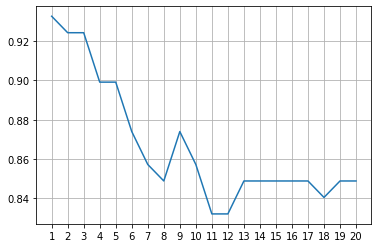

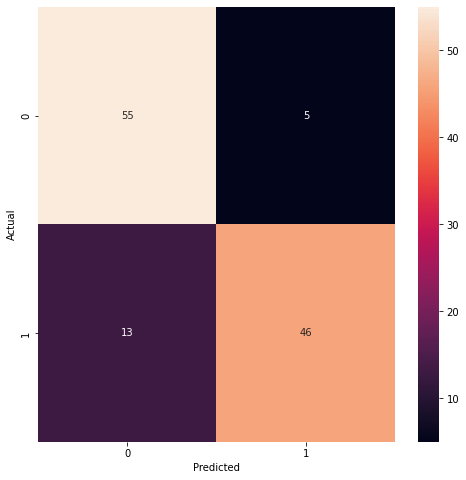

In [ ]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
for k in range(1, 21):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test,y_test))

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,21)],accuracies)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid() 

from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,classifier.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(X_test)))

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8823529411764706


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9245283018867925
Recall: 0.8305084745762712


Random Forest Model

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


              precision    recall  f1-score   support

           0       0.90      1.00      0.94        60
           1       1.00      0.88      0.94        59

    accuracy                           0.94       119
   macro avg       0.95      0.94      0.94       119
weighted avg       0.95      0.94      0.94       119


Best Parameter: {'n_estimators': 100}



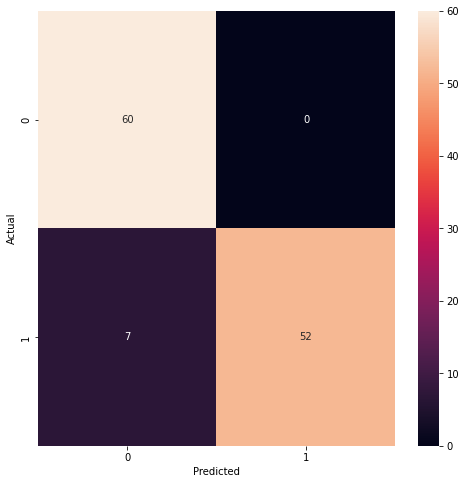

In [ ]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

In [ ]:
!pip install 'neptune-contrib[monitoring]>=0.24.9'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 74 kB 2.0 MB/s 
     |████████████████████████████████| 320 kB 36.1 MB/s 
     |████████████████████████████████| 100 kB 9.2 MB/s 
     |████████████████████████████████| 106 kB 45.3 MB/s 
     |████████████████████████████████| 135 kB 50.5 MB/s 
     |████████████████████████████████| 175 kB 41.2 MB/s 
     |████████████████████████████████| 705 kB 44.8 MB/s 
     |████████████████████████████████| 925 kB 38.9 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 829 kB 29.2 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 181 kB 33.7 MB/s 
     |████████████████████████████████| 132 kB 42.6 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 

In [ ]:
import neptune
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# here you import `neptune_calback` that does the magic (the open source magic :)
from neptunecontrib.monitoring.xgboost_monitor import neptune_callback

/usr/local/lib/python3.7/dist-packages/neptunecontrib/monitoring/xgboost_monitor.py:21: UserWarning: neptunecontrib.monitoring.xgboost_monitor was moved to neptunecontrib.monitoring.xgboost
neptunecontrib.monitoring.xgboost_monitor will be removed in future releases.

  warnings.warn(message)


In [ ]:
params = {'max_depth': 5,
          'eta': 0.5,
          'gamma': 0.1,
          'silent': 1,
          'subsample': 1,
          'lambda': 1,
          'alpha': 0.35,
          'objective': 'reg:linear',
          'eval_metric': ['mae', 'rmse']}
watchlist = [(dtest), (dtrain,)]
num_round = 20

NameError: ignored

In [ ]:
neptune.create_experiment(name='xgb', tags=['sklearn'], params=params)
reg = xgb.XGBRegressor(**params)
reg.fit(X_train, y_train,
        eval_metric=['mae', 'rmse'],
        eval_set=[(X_test, y_test)],
        callbacks=[neptune_callback(log_tree=[0,1])])